In [14]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from scipy.misc.pilutil import toimage
%matplotlib inline 

In [15]:
np.random.seed(42)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# Размер мини-выборки
batch_size = 32
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
# Преобразуем метки классов в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

C:\Users\User\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


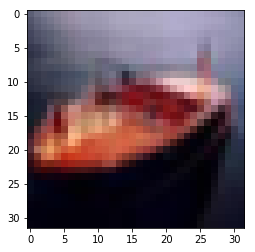

Номер класса: [8]
Тип объекта: корабль


In [8]:
n = 9545
plt.imshow(toimage(X_train[n]))
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

In [9]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))


In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 103s - loss: 2.0815 - acc: 0.2336 - val_loss: 1.8712 - val_acc: 0.3292
Epoch 2/25
 - 101s - loss: 1.7758 - acc: 0.3612 - val_loss: 1.8281 - val_acc: 0.3480
Epoch 3/25
 - 102s - loss: 1.6121 - acc: 0.4159 - val_loss: 1.6702 - val_acc: 0.3976
Epoch 4/25
 - 103s - loss: 1.5030 - acc: 0.4561 - val_loss: 1.3726 - val_acc: 0.5088
Epoch 5/25
 - 103s - loss: 1.4134 - acc: 0.4899 - val_loss: 1.3162 - val_acc: 0.5238
Epoch 6/25
 - 102s - loss: 1.3370 - acc: 0.5192 - val_loss: 1.2659 - val_acc: 0.5418
Epoch 7/25
 - 102s - loss: 1.2706 - acc: 0.5448 - val_loss: 1.1948 - val_acc: 0.5800
Epoch 8/25
 - 102s - loss: 1.2171 - acc: 0.5644 - val_loss: 1.3807 - val_acc: 0.5140
Epoch 9/25
 - 101s - loss: 1.1627 - acc: 0.5844 - val_loss: 1.0648 - val_acc: 0.6252
Epoch 10/25
 - 101s - loss: 1.1160 - acc: 0.6045 - val_loss: 1.3401 - val_acc: 0.5594
Epoch 11/25
 - 101s - loss: 1.0723 - acc: 0.6186 - val_loss: 0.9843 - val_acc: 0.6578
Epoch 12/25
 -

In [16]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 72.91%


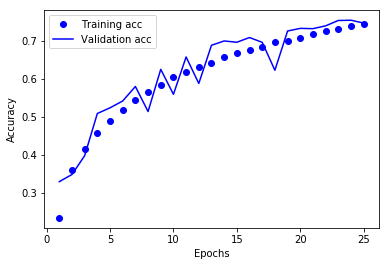

In [17]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
model_json = model.to_json()
with open("cifar10_model.json", "w") as f:
    f.write(model_json)

model.save_weights("cifar10_model.h5")

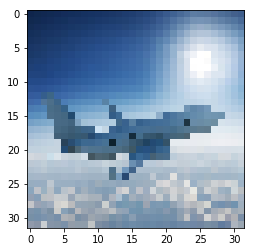

In [21]:
img_path = 'plane.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

In [25]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [27]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

самолет
